# 对数据库操作的演示

In [56]:
# 请先配置好数据库连接信息 -> database/config/database-config.txt
# 请先运行该脚本，再运行其他脚本
# 导入数据库依赖文件
import database.utils as db_utils
import database.models as db_models
import database.api as db_api

In [60]:
# 简易化初始化数据库（创建数据库，创建数据表，内容生成）
db_utils.init_database()

2024-05-20 20:22:08,532 - database.utils - WARNING - Database already exists.


2024-05-20 20:22:08,700 - database.utils - INFO - Tables dropped successfully.
2024-05-20 20:22:08,894 - database.utils - INFO - Tables created successfully.
2024-05-20 20:22:08,895 - database.utils - INFO - Start to generate fake data based on the config file.
Adding Admin Data |████████████████████████████████████████| 3/3 [100%] in 0.0s (34924.30/s) 
2024-05-20 20:22:08,901 - database.utils - INFO - Admin data added successfully.
Adding Supplier Data |████████████████████████████████████████| 20/20 [100%] in 0.0s (18554.60/s) 
2024-05-20 20:22:08,924 - database.utils - INFO - Supplier data added successfully.
Adding Vegetable Data |████████████████████████████████████████| 36/36 [100%] in 0.0s (93457.97/s) 
2024-05-20 20:22:08,936 - database.utils - INFO - Vegetable data added successfully.
Adding Customer Data |████████████████████████████████████████| 1500/1500 [100%] in 0.1s (21273.00/s) 
2024-05-20 20:22:09,237 - database.utils - INFO - Customer data added successfully.
Adding C

In [10]:
#使用api获取各类数据DataFrame
vegeDF = db_api.getVegetableDataFrame() # 获取蔬菜数据并转换为 Pandas 的 DataFrame
vegeDF.head()

,vegetable_name,purchase_quantity,purchase_price,supplier_id,selling_price,vip_price
id,,,,,,
1,西红柿,100.0,1.17,18,1.40,1.26
2,黄瓜,50.0,1.53,3,1.83,1.65
3,茄子,50.0,2.08,17,2.49,2.24
4,土豆,10.0,3.61,17,4.33,3.89
5,胡萝卜,100.0,4.08,13,4.90,4.41


In [5]:
# 使用api实用小工具
# 获取所有顾客男女人数
db_api.getCustomerGenderCounts()

{'male': 589, 'female': 911}

In [6]:
# 获取某个蔬菜的评价词汇频率总汇
db_api.getReviewWordFrequency('豆角')

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\s2300/nltk_data'
    - 'c:\\Users\\s2300\\Desktop\\Vegehub-main\\venv\\nltk_data'
    - 'c:\\Users\\s2300\\Desktop\\Vegehub-main\\venv\\share\\nltk_data'
    - 'c:\\Users\\s2300\\Desktop\\Vegehub-main\\venv\\lib\\nltk_data'
    - 'C:\\Users\\s2300\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [7]:
# 制作云图
import wordcloud as wc

cloudText = ' '.join(db_api.getReviewWordFrequency('豆角').keys())
wordCloud = wc.WordCloud(width=800, height=400, background_color='white').generate(cloudText)
wordCloud.to_file('./imgs/豆角评价.png')
wordCloud.to_image() # 显示图片

LookupError: 
**********************************************************************
  Resource [93mpunkt[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt/english.pickle[0m

  Searched in:
    - 'C:\\Users\\s2300/nltk_data'
    - 'c:\\Users\\s2300\\Desktop\\Vegehub-main\\venv\\nltk_data'
    - 'c:\\Users\\s2300\\Desktop\\Vegehub-main\\venv\\share\\nltk_data'
    - 'c:\\Users\\s2300\\Desktop\\Vegehub-main\\venv\\lib\\nltk_data'
    - 'C:\\Users\\s2300\\AppData\\Roaming\\nltk_data'
    - 'C:\\nltk_data'
    - 'D:\\nltk_data'
    - 'E:\\nltk_data'
    - ''
**********************************************************************


In [58]:
# 数据加载
vegeDF2 = db_api.getMarketPriceDataFrame()

# 筛选出所有 'vegetable_name' 列中值为 '丝瓜' 的行
sigua_rows = vegeDF2.loc[vegeDF2['vegetable_name'] == '土豆']
sigua_rows

,vegetable_name,price,sale_volume,season,date
id,,,,,
1,土豆,3.83,30.27,winter,2024-02-09
3,土豆,4.25,32.51,spring,2024-04-01
4,土豆,3.16,139.66,autumn,2023-09-02
6,土豆,6.23,58.32,summer,2023-08-02
138,土豆,0.93,20.29,winter,2024-01-01
...,...,...,...,...,...
99903,土豆,5.94,109.30,summer,2023-07-26
99921,土豆,2.60,28.12,spring,2024-03-19
99948,土豆,4.05,98.71,summer,2023-08-19


Total records for 南瓜: 288
    vegetable_name  price  sale_volume  season        date
id                                                        
15              南瓜   4.63        54.11  summer  2023-06-14
152             南瓜   3.26        41.89  winter  2023-12-18
153             南瓜   3.42        36.40  winter  2024-01-06
192             南瓜   7.33        30.94  spring  2023-05-28
220             南瓜   5.75        42.09  summer  2023-06-03
vegetable_name    0
price             0
sale_volume       0
season            0
date              0
dtype: int64
Mean Squared Error (Price, Random Forest): 5.849700192132156
Mean Squared Error (Sales, Random Forest): 494.91266549807864


C:\Users\s2300\AppData\Local\Temp\ipykernel_17576\2502569922.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vege_rows['date'] = pd.to_datetime(vege_rows['date'])


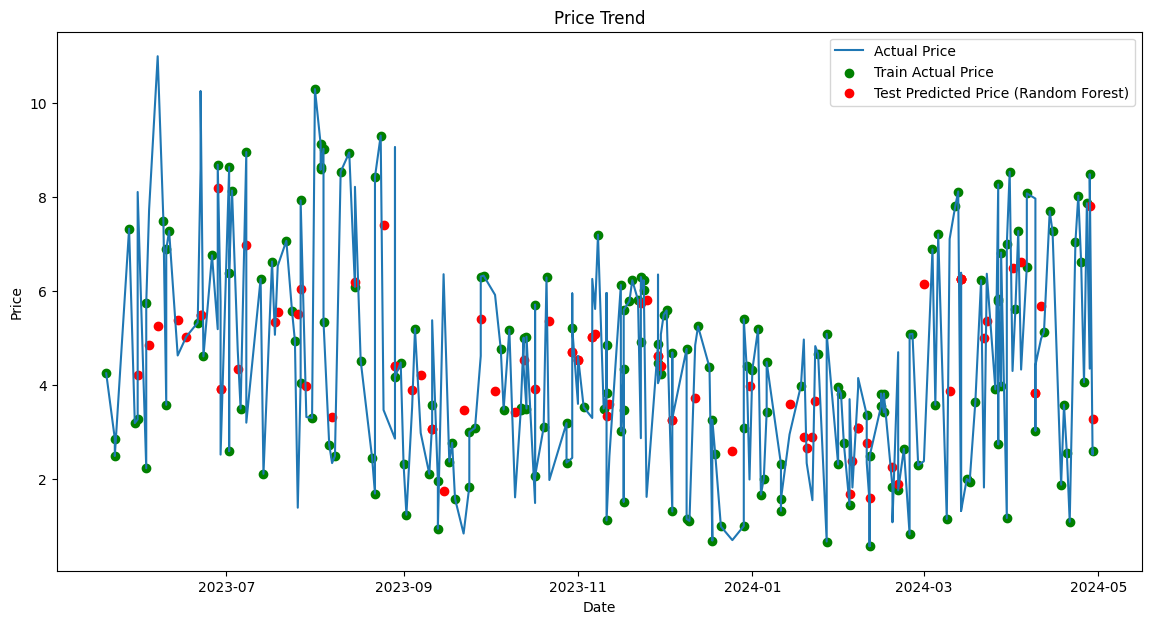

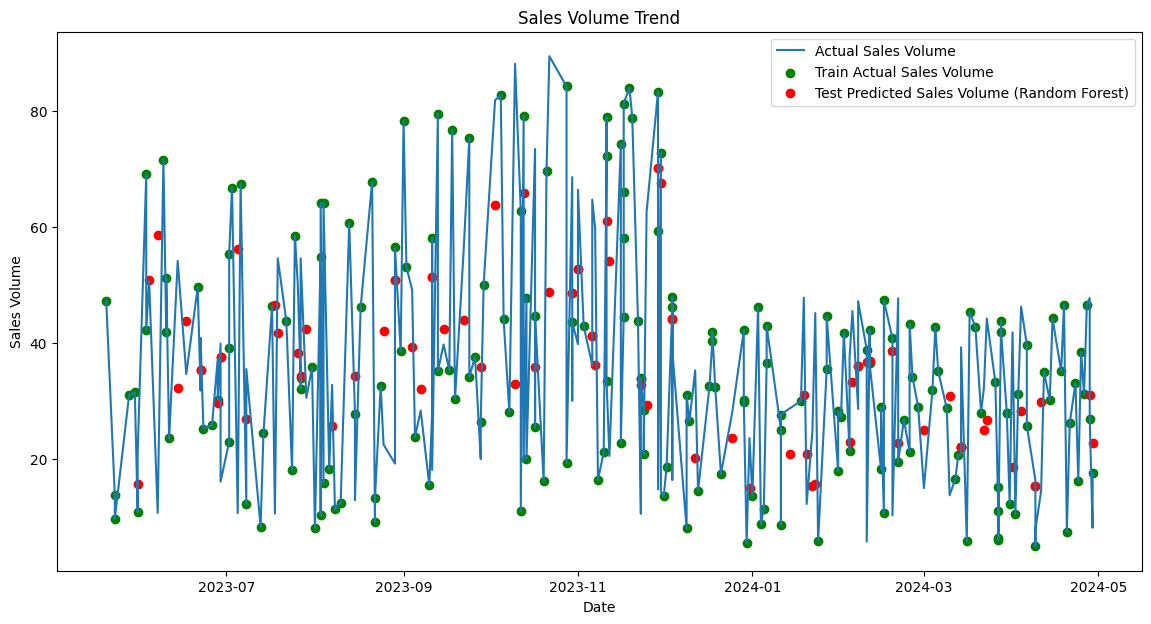

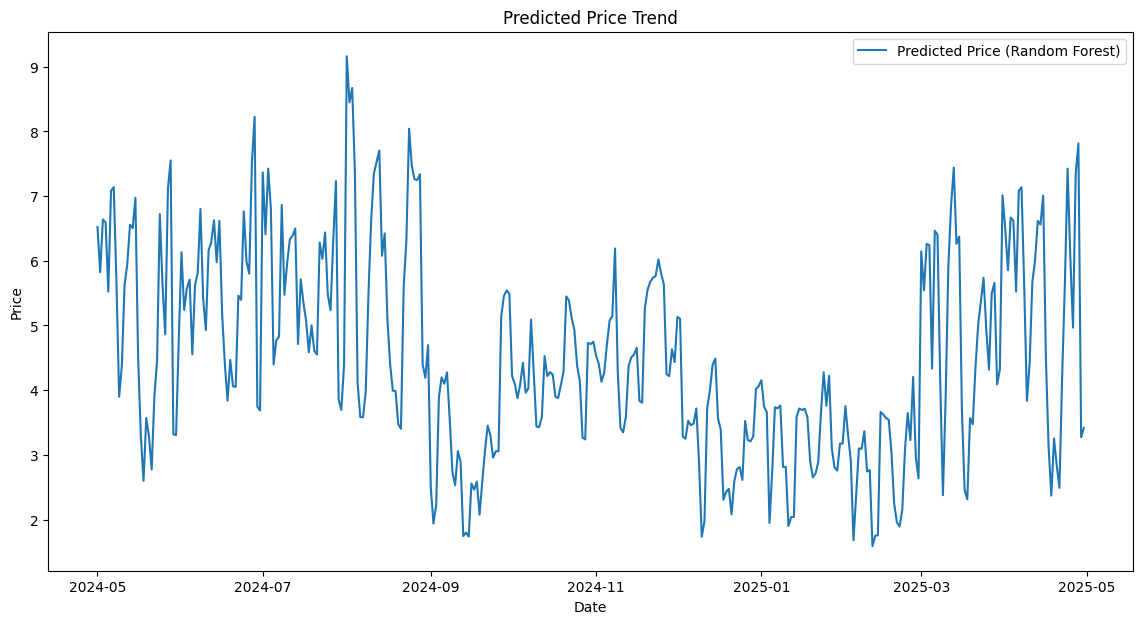

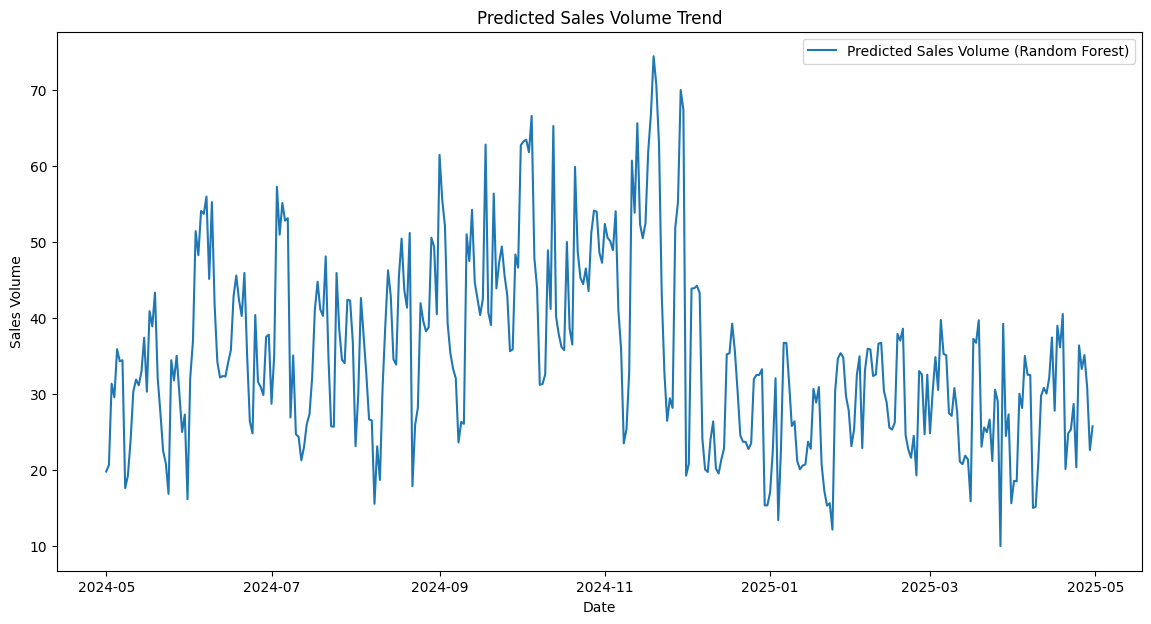

In [61]:
# Random Forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

def predict_vegetable(vegetable_name):
    # 数据加载
    vegeDF2 = db_api.getMarketPriceDataFrame()

    # 筛选出所有 'vegetable_name' 列中值为指定蔬菜名的行
    vege_rows = vegeDF2.loc[vegeDF2['vegetable_name'] == vegetable_name]

    # 检查数据量
    print(f"Total records for {vegetable_name}:", len(vege_rows))

    # 检查数据样本
    print(vege_rows.head())

    # 检查缺失值
    print(vege_rows.isnull().sum())

    # 确保日期列是日期格式
    vege_rows['date'] = pd.to_datetime(vege_rows['date'])

    # 数据筛选：选择日期范围内的数据作为训练集
    start_date = pd.to_datetime("2023-05-01")
    end_date = pd.to_datetime("2024-04-30")
    filtered_data = vege_rows[(vege_rows['date'] >= start_date) & (vege_rows['date'] <= end_date)]

    # 按日期排序
    filtered_data = filtered_data.sort_values('date')

    # 特征工程
    filtered_data['year'] = filtered_data['date'].dt.year
    filtered_data['month'] = filtered_data['date'].dt.month
    filtered_data['day'] = filtered_data['date'].dt.day
    filtered_data['quarter'] = filtered_data['date'].dt.quarter  # 添加季度特征

    # 准备数据集
    data = filtered_data[['date', 'year', 'month', 'day', 'quarter', 'price', 'sale_volume']]

    # 划分训练集和测试集
    train_data, test_data = train_test_split(data, test_size=0.3, shuffle=True, random_state=42)

    # 数据预处理
    scaler = MinMaxScaler(feature_range=(0, 1))
    train_scaled = scaler.fit_transform(train_data.drop(columns=['date']))
    test_scaled = scaler.transform(test_data.drop(columns=['date']))

    X_train = train_scaled[:, :-2]
    y_train_price = train_scaled[:, -2]
    y_train_sales = train_scaled[:, -1]
    X_test = test_scaled[:, :-2]
    y_test_price = test_scaled[:, -2]
    y_test_sales = test_scaled[:, -1]

    # 训练随机森林模型
    model_price_rf = RandomForestRegressor(n_estimators=100, random_state=42)
    model_sales_rf = RandomForestRegressor(n_estimators=100, random_state=42)

    model_price_rf.fit(X_train, y_train_price)
    model_sales_rf.fit(X_train, y_train_sales)

    # 预测和评估
    y_pred_price_rf = model_price_rf.predict(X_test)
    y_pred_sales_rf = model_sales_rf.predict(X_test)

    # 反标准化预测结果
    y_train_inv_price = scaler.inverse_transform(np.concatenate((X_train, y_train_price.reshape(-1, 1), y_train_sales.reshape(-1, 1)), axis=1))[:, -2]
    y_train_inv_sales = scaler.inverse_transform(np.concatenate((X_train, y_train_price.reshape(-1, 1), y_train_sales.reshape(-1, 1)), axis=1))[:, -1]

    y_test_inv_price = scaler.inverse_transform(np.concatenate((X_test, y_test_price.reshape(-1, 1), y_test_sales.reshape(-1, 1)), axis=1))[:, -2]
    y_pred_inv_price_rf = scaler.inverse_transform(np.concatenate((X_test, y_pred_price_rf.reshape(-1, 1), y_test_sales.reshape(-1, 1)), axis=1))[:, -2]

    y_test_inv_sales = scaler.inverse_transform(np.concatenate((X_test, y_test_price.reshape(-1, 1), y_test_sales.reshape(-1, 1)), axis=1))[:, -1]
    y_pred_inv_sales_rf = scaler.inverse_transform(np.concatenate((X_test, y_test_price.reshape(-1, 1), y_pred_sales_rf.reshape(-1, 1)), axis=1))[:, -1]

    mse_price_rf = mean_squared_error(y_test_inv_price, y_pred_inv_price_rf)
    mse_sales_rf = mean_squared_error(y_test_inv_sales, y_pred_inv_sales_rf)

    print('Mean Squared Error (Price, Random Forest):', mse_price_rf)
    print('Mean Squared Error (Sales, Random Forest):', mse_sales_rf)

    # 确保日期与训练集、测试集数据大小一致
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)

    # 可视化训练集、测试集和真实值的价格
    plt.figure(figsize=(14, 7))
    plt.plot(filtered_data['date'], filtered_data['price'], label='Actual Price')
    plt.scatter(train_data['date'], y_train_inv_price, color='green', label='Train Actual Price')
    plt.scatter(test_data['date'], y_pred_inv_price_rf, color='red', label='Test Predicted Price (Random Forest)')
    plt.title('Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # 可视化训练集、测试集和真实值的销售量
    plt.figure(figsize=(14, 7))
    plt.plot(filtered_data['date'], filtered_data['sale_volume'], label='Actual Sales Volume')
    plt.scatter(train_data['date'], y_train_inv_sales, color='green', label='Train Actual Sales Volume')
    plt.scatter(test_data['date'], y_pred_inv_sales_rf, color='red', label='Test Predicted Sales Volume (Random Forest)')
    plt.title('Sales Volume Trend')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.show()

    # 使用模型进行未来的预测
    future_dates = pd.date_range('2024-05-01', '2025-04-30', freq='D')
    future_df = pd.DataFrame({
        'date': future_dates,
        'year': future_dates.year,
        'month': future_dates.month,
        'day': future_dates.day,
        'quarter': future_dates.quarter,
        'price': np.nan,
        'sale_volume': np.nan
    })

    # 确保特征列顺序与训练时一致
    future_scaled = scaler.transform(future_df[['year', 'month', 'day', 'quarter', 'price', 'sale_volume']])
    future_pred_price_rf = model_price_rf.predict(future_scaled[:, :-2])
    future_pred_sales_rf = model_sales_rf.predict(future_scaled[:, :-2])

    # 反标准化预测结果
    future_pred_price_inv_rf = scaler.inverse_transform(np.concatenate((future_scaled[:, :-2], future_pred_price_rf.reshape(-1, 1), future_pred_sales_rf.reshape(-1, 1)), axis=1))[:, -2]
    future_pred_sales_inv_rf = scaler.inverse_transform(np.concatenate((future_scaled[:, :-2], future_pred_price_rf.reshape(-1, 1), future_pred_sales_rf.reshape(-1, 1)), axis=1))[:, -1]

    # 可视化未来一年的价格预测
    plt.figure(figsize=(14, 7))
    plt.plot(future_df['date'], future_pred_price_inv_rf, label='Predicted Price (Random Forest)')
    plt.title('Predicted Price Trend')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

    # 可视化未来一年的销售量预测
    plt.figure(figsize=(14, 7))
    plt.plot(future_df['date'], future_pred_sales_inv_rf, label='Predicted Sales Volume (Random Forest)')
    plt.title('Predicted Sales Volume Trend')
    plt.xlabel('Date')
    plt.ylabel('Sales Volume')
    plt.legend()
    plt.show()

# 示例调用
predict_vegetable('南瓜')
